<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####

from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [2]:
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, AlphaDropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
X_train_clean = Normalizer().fit_transform(X_train)
X_test_clean = Normalizer().fit_transform(X_test)

In [9]:
print(X_train_clean.shape)
print(X_test_clean.shape)

(404, 13)
(102, 13)


In [66]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stop = EarlyStopping(monitor='mean_squared_error', min_delta=0.005, patience=3)

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, activation="selu"))
model.add(AlphaDropout(rate=2))
model.add(Dense(512, activation="selu"))
model.add(AlphaDropout(rate=2))
model.add(Dense(256, activation="selu"))
model.add(AlphaDropout(rate=2))
model.add(Dense(128, activation="selu"))
model.add(AlphaDropout(rate=2))
model.add(Dense(64, activation="selu"))
model.add(AlphaDropout(rate=2))
model.add(Dense(32, activation="selu"))
model.add(AlphaDropout(rate=2))
model.add(Dense(16, activation="selu"))
model.add(AlphaDropout(rate=2))
model.add(Dense(4, activation="selu"))
model.add(AlphaDropout(rate=2))
model.add(Dense(1, activation="selu"))

model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError(), "mean_absolute_percentage_error"]) #adjust loss function, optimizer, and metrics

results = model.fit(x=X_train_clean, 
        y=y_train, 
        epochs=5, 
        validation_data=(X_test_clean, y_test), 
        callbacks=[tensorboard_callback, stop])



Epoch 1/5
13/13 [==============================] - 0s 22ms/step - loss: 49.6224 - mean_squared_error: 228.2322 - mean_absolute_percentage_error: 49.6224 - val_loss: 34.7617 - val_mean_squared_error: 97.8330 - val_mean_absolute_percentage_error: 34.7617
Epoch 2/5
13/13 [==============================] - 0s 12ms/step - loss: 28.9850 - mean_squared_error: 93.6906 - mean_absolute_percentage_error: 28.9850 - val_loss: 30.7089 - val_mean_squared_error: 83.3992 - val_mean_absolute_percentage_error: 30.7089
Epoch 3/5
13/13 [==============================] - 0s 12ms/step - loss: 24.4613 - mean_squared_error: 76.9650 - mean_absolute_percentage_error: 24.4613 - val_loss: 29.2122 - val_mean_squared_error: 64.4215 - val_mean_absolute_percentage_error: 29.2122
Epoch 4/5
13/13 [==============================] - 0s 12ms/step - loss: 25.0603 - mean_squared_error: 80.0348 - mean_absolute_percentage_error: 25.0603 - val_loss: 28.1160 - val_mean_squared_error: 78.1505 - val_mean_absolute_percentage_error:

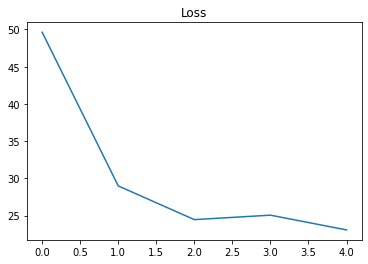

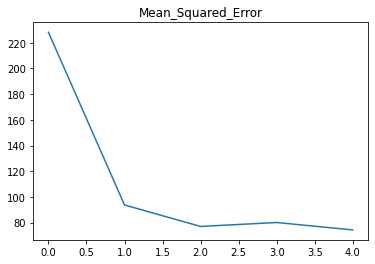

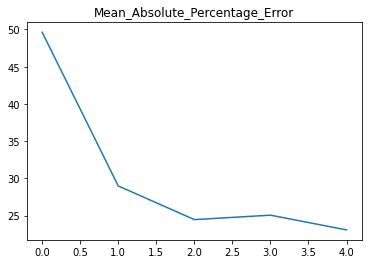

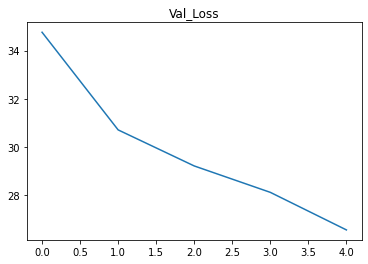

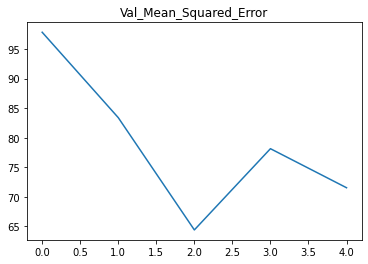

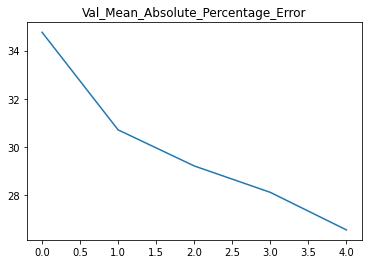

In [67]:
epochs_df = pd.DataFrame.from_dict(results.history)

for column in epochs_df:
    fig, ax = plt.subplots()
    sns.lineplot(data=epochs_df[column], ax=ax)
    plt.title(column.title())

In [8]:
model = LinearRegression()
model.fit(X_train_clean, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
predicted_lr_model = model.predict(X_test_clean)

In [15]:
mean_squared_error(y_test, predicted_lr_model)

18.16551049349646

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [ ]:
##### Your Code Here #####

In [16]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [21]:
print("train_images\n", train_images.shape, "\ntrain_labels\n", train_labels.shape, "\n")

print("test_images\n", test_images.shape, "\ntest_labels\n", test_labels.shape)

train_images
 (60000, 28, 28) 
train_labels
 (60000,) 

test_images
 (10000, 28, 28) 
test_labels
 (10000,)


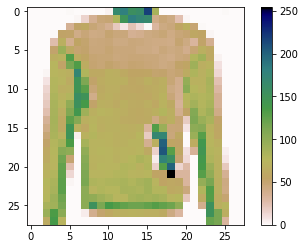

In [37]:
plt.figure()
plt.imshow(train_images[404], cmap="gist_earth_r")
plt.colorbar()
plt.grid(False)
plt.show()

In [38]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [39]:
train_images = train_images / 255.0

test_images = test_images / 255.0

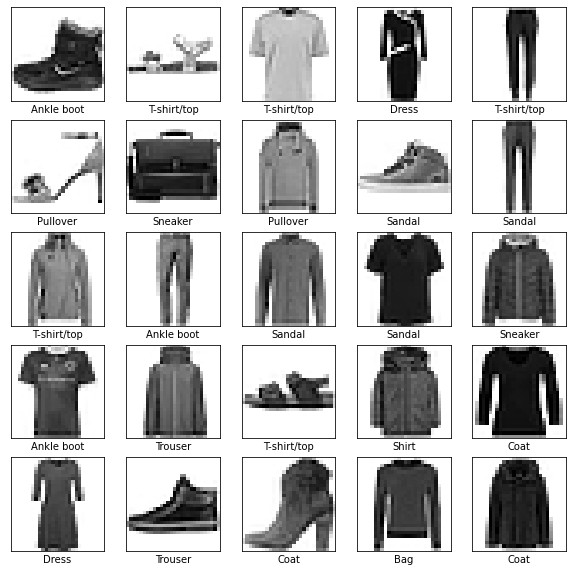

In [48]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[-i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [52]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
results = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2304 - accuracy: 0.9133
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2238 - accuracy: 0.9163
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2174 - accuracy: 0.9190
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2099 - accuracy: 0.9212
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2034 - accuracy: 0.9233
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1988 - accuracy: 0.9253
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1921 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1887 - accuracy: 0.9292
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1827 - accuracy: 0.9315
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.178

In [61]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3460 - accuracy: 0.8902

Test accuracy: 0.8902000188827515


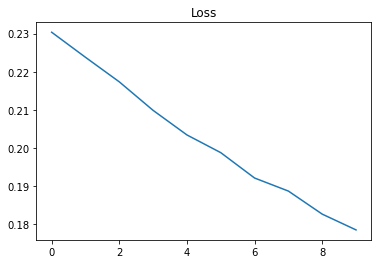

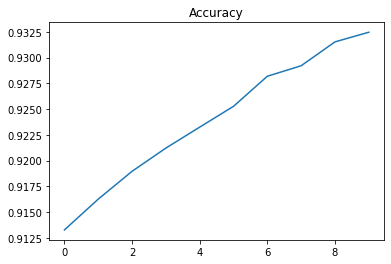

In [65]:
epochs_df = pd.DataFrame.from_dict(results.history)

for column in epochs_df:
    fig, ax = plt.subplots()
    sns.lineplot(data=epochs_df[column], ax=ax)
    plt.title(column.title())

In [55]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [56]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

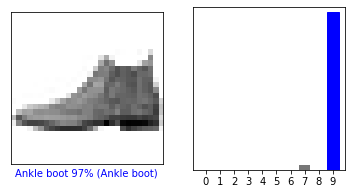

In [59]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

https://www.tensorflow.org/tutorials/keras/classification

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.